## Calculating the Return of a Portfolio of Securities

Load the data for a portfolio composed of 5 stocks - British Petroleum, Ford, Exxon, Lincoln, and Apple *(5_stocks_2000_2017.csv)*.

In [3]:
import numpy
import pandas
import pandas_datareader
import matplotlib

In [6]:
rec_data = pandas.read_csv(r'C:\Users\Dom\Desktop\Moje\Python\Udemy\Python for Finance - Notebook Files\67 Calculating the Return of a Portfolio of Securities\CSV\Python 3 CSV\4_stocks_1995_2017.csv')
rec_data = rec_data.set_index('Date')
print(rec_data)

                   PG       MSFT          F         GE
Date                                                  
1995-01-03   8.960464   2.498429   5.091914   4.479902
1995-01-04   8.888638   2.516591   5.228918   4.479902
1995-01-05   8.762941   2.475080   5.183250   4.490882
1995-01-06   8.780898   2.516591   5.183250   4.468922
1995-01-09   8.744981   2.501024   5.274583   4.425002
1995-01-10   8.852727   2.532156   5.183250   4.457940
1995-01-11   8.834767   2.547723   5.183250   4.523821
1995-01-12   8.924553   2.542534   5.137584   4.512840
1995-01-13   9.029293   2.604801   5.228918   4.567741
1995-01-16   9.101528   2.661878   5.297417   4.622642
1995-01-17   9.137644   2.682633   5.251751   4.567741
1995-01-18   8.939000   2.700794   5.160417   4.589701
1995-01-19   8.902880   2.635934   5.023414   4.479902
1995-01-20   8.866770   2.558101   4.817909   4.479902
1995-01-23   8.957059   2.607396   4.795077   4.414021
1995-01-24   8.939000   2.574315   4.750797   4.425002
1995-01-25

### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

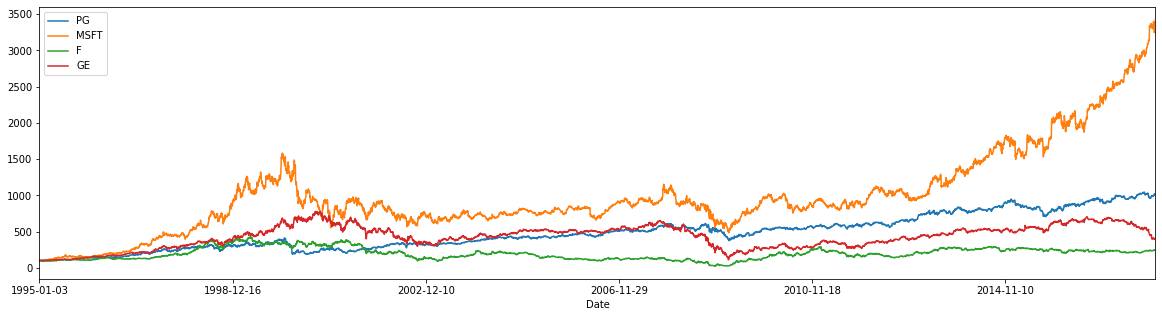

In [11]:
(rec_data / rec_data.iloc[0] * 100).plot(figsize = (20,5))
matplotlib.pyplot.show()

In [16]:
rec_data['MSFT'][0]

2.4984290000000002

In [18]:
norm = pandas.DataFrame()
norm['Normalization_to_100_MSFT'] = (rec_data['MSFT']/rec_data['MSFT'].iloc[0])*100
print(norm)

            Normalization_to_100_MSFT
Date                                 
1995-01-03                 100.000000
1995-01-04                 100.726937
1995-01-05                  99.065453
1995-01-06                 100.726937
1995-01-09                 100.103865
1995-01-10                 101.349928
1995-01-11                 101.973000
1995-01-12                 101.765309
1995-01-13                 104.257555
1995-01-16                 106.542071
1995-01-17                 107.372793
1995-01-18                 108.099690
1995-01-19                 105.503658
1995-01-20                 102.388381
1995-01-23                 104.361421
1995-01-24                 103.037349
1995-01-25                 102.596071
1995-01-26                  99.480794
1995-01-27                  99.480794
1995-01-30                  98.027000
1995-01-31                  98.650112
1995-02-01                  98.234691
1995-02-02                  98.027000
1995-02-03                  99.896175
1995-02-06  

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [29]:
ret = rec_data / rec_data.shift(1) -1
print(ret)

                  PG      MSFT         F        GE
Date                                              
1995-01-03       NaN       NaN       NaN       NaN
1995-01-04 -0.008016  0.007269  0.026906  0.000000
1995-01-05 -0.014141 -0.016495 -0.008734  0.002451
1995-01-06  0.002049  0.016772  0.000000 -0.004890
1995-01-09 -0.004090 -0.006186  0.017621 -0.009828
1995-01-10  0.012321  0.012448 -0.017316  0.007444
1995-01-11 -0.002029  0.006148  0.000000  0.014778
1995-01-12  0.010163 -0.002037 -0.008810 -0.002427
1995-01-13  0.011736  0.024490  0.017778  0.012166
1995-01-16  0.008000  0.021912  0.013100  0.012019
1995-01-17  0.003968  0.007797 -0.008620 -0.011877
1995-01-18 -0.021739  0.006770 -0.017391  0.004808
1995-01-19 -0.004041 -0.024015 -0.026549 -0.023923
1995-01-20 -0.004056 -0.029528 -0.040909  0.000000
1995-01-23  0.010183  0.019270 -0.004739 -0.014706
1995-01-24 -0.002016 -0.012687 -0.009234  0.002488
1995-01-25  0.014142 -0.004283  0.014563  0.007444
1995-01-26  0.003984 -0.030364 

First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [22]:
weights = numpy.array([0.25, 0.25, 0.25, 0.25])

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [36]:
ret_perc = numpy.dot(ret.mean()*250,weights)
ret_perc = round(ret_perc*100,3)

In [37]:
print("Średnia roczna stopa zwrotu portfela akcji wynosi {}%".format(ret_perc))

Średnia roczna stopa zwrotu portfela akcji wynosi 13.737%


Transform the result into a percentage form. 

Is the return of this portfolio satisfactory?